Database 'adidas_mini.db' created and populated!

--- Adidas Mini-Store Summary ---


,item_name,Total_Volume,Total_Revenue
0,UltraBoost,7,1260.0
1,Stan Smith,14,1190.0
2,Yeezy,3,900.0
3,Hoodie,15,900.0


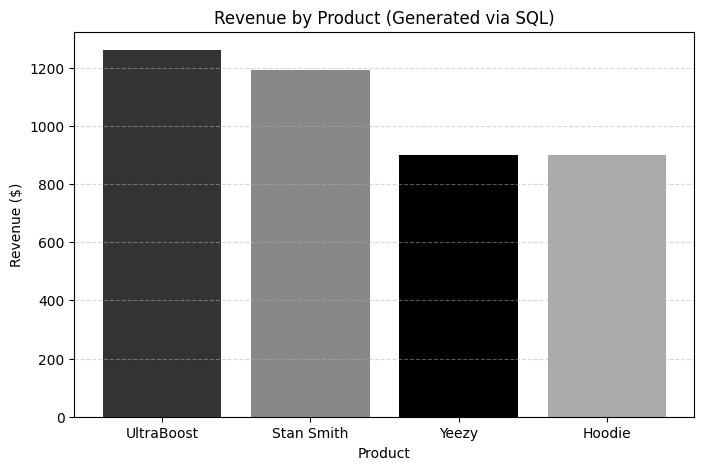


SUCCESS: 'Task7_Adidas_Query.sql' and 'Task7_Adidas_Chart.png' are ready to download.


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- PART 1: BUILD THE DATABASE (Data Engineering) ---
# 1. Create a connection to a new file 'adidas_mini.db'
conn = sqlite3.connect('adidas_mini.db')
cursor = conn.cursor()

# 2. Create a table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS store_sales (
        id INTEGER PRIMARY KEY,
        item_name TEXT,
        units_sold INTEGER,
        price_per_unit REAL
    )
''')

# 3. Generate some dummy Adidas data
# (Item Name, Units Sold, Price)
data = [
    ('UltraBoost', 5, 180),
    ('Stan Smith', 10, 85),
    ('UltraBoost', 2, 180),
    ('Yeezy', 1, 300),
    ('Hoodie', 15, 60),
    ('Stan Smith', 4, 85),
    ('Yeezy', 2, 300)
]

# 4. Insert data into the database
cursor.executemany('INSERT INTO store_sales (item_name, units_sold, price_per_unit) VALUES (?, ?, ?)', data)
conn.commit()
print("Database 'adidas_mini.db' created and populated!")

# --- PART 2: ANALYZE THE DATA (Data Analysis) ---
# 5. Run the SQL Query to aggregate sales
query = """
SELECT
    item_name,
    SUM(units_sold) as Total_Volume,
    SUM(units_sold * price_per_unit) as Total_Revenue
FROM store_sales
GROUP BY item_name
ORDER BY Total_Revenue DESC;
"""

# 6. Load results into Pandas
df = pd.read_sql_query(query, conn)

# 7. Display the Data Table
print("\n--- Adidas Mini-Store Summary ---")
display(df)

# 8. Visualize (Bar Chart)
plt.figure(figsize=(8, 5))
plt.bar(df['item_name'], df['Total_Revenue'], color=['#333333', '#888888', '#000000', '#aaaaaa'])
plt.title('Revenue by Product (Generated via SQL)')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('Task7_Adidas_Chart.png') # Save for the report
plt.show()

# --- PART 3: EXPORT SQL FILE ---
with open('Task7_Adidas_Query.sql', 'w') as f:
    f.write(query)
print("\nSUCCESS: 'Task7_Adidas_Query.sql' and 'Task7_Adidas_Chart.png' are ready to download.")